In [1]:
from __future__ import annotations

from ast import literal_eval
from pathlib import Path

import pandas as pd

path = Path("data/2024_11")

columns_bb = ["task_id", "RandomSearch", "SMAC3-BlackBoxFacade", "Nevergrad-CMA-ES"]
columns_mo = ["task_id", "RandomSearch", "Optuna-MO-TPE", "Nevergrad-DE"]


result_files = list(path.glob("*.txt"))
result_files.sort()
result_files

results = []
for result_file in result_files:
    print(result_file)
    with result_file.open() as f:
        lines = f.readlines()
        # print(lines[0])
        subset_raw = "".join(lines[2:]).replace(" ", ",")
        stats_raw = lines[0].strip("\n").split(",")
        stats_raw = [x.strip(" ") for x in stats_raw]
        stats_raw = [x.split("=") for x in stats_raw]
        stats = {x[0]: literal_eval(x[1]) for x in stats_raw}

        stem = result_file.stem
        scenario = stem.split("_")[0]
        scenario = scenario.replace("Mo", "MO")
        is_df_crit_log = "log" in stem
        subset_id = "test" if "TEST" in stem else "dev"
        stats["subset_id"] = subset_id
        stats["scenario"] = scenario
        stats["is_df_crit_log"] = is_df_crit_log
        result = {
            "scenario": scenario,
            "is_df_crit_log": is_df_crit_log,
            "stats": stats,
            "subset": subset_raw,
            "subset_id": subset_id
        }

        subset_fn = path / f"{scenario}_{is_df_crit_log}_{subset_id}_{stats['k']}.csv"
        cols = columns_mo if "MO" in scenario else columns_bb
        col_line = ",".join(cols)
        subset_raw = col_line + "\n" + subset_raw
        with open(subset_fn, "w") as f:
            f.write(subset_raw)

        print(subset_fn)

        # print(result)
    results.append(result)
results = pd.DataFrame(results)
results.to_csv(path / "results.csv", index=False)
results

data/2024_11/BBv2_Init_b_100_TEST100.txt
data/2024_11/BBv2_False_test_100.csv
data/2024_11/BBv2_Init_b_10_TEST10.txt
data/2024_11/BBv2_False_test_10.csv
data/2024_11/BBv2_Init_b_20_TEST20.txt
data/2024_11/BBv2_False_test_20.csv
data/2024_11/BBv2_Init_b_30_TEST30.txt
data/2024_11/BBv2_False_test_30.csv
data/2024_11/BBv2_Init_b_40_TEST40.txt
data/2024_11/BBv2_False_test_40.csv
data/2024_11/BBv2_Init_b_50_TEST50.txt
data/2024_11/BBv2_False_test_50.csv
data/2024_11/BBv2_Init_b_5_TEST5.txt
data/2024_11/BBv2_False_test_5.csv
data/2024_11/BBv2_Init_b_60_TEST60.txt
data/2024_11/BBv2_False_test_60.csv
data/2024_11/BBv2_Init_b_70_TEST70.txt
data/2024_11/BBv2_False_test_70.csv
data/2024_11/BBv2_Init_b_80_TEST80.txt
data/2024_11/BBv2_False_test_80.csv
data/2024_11/BBv2_Init_b_90_TEST90.txt
data/2024_11/BBv2_False_test_90.csv
data/2024_11/BBv2_df_crit_a_RES10.txt
data/2024_11/BBv2_False_dev_10.csv
data/2024_11/BBv2_df_crit_a_RES100.txt
data/2024_11/BBv2_False_dev_100.csv
data/2024_11/BBv2_df_crit_a

,scenario,is_df_crit_log,stats,subset,subset_id
0,BBv2,False,"{'n': 1217, 'k': 100, 'dim': 3, 'discrepancy':...","bbob/noiseless/16/1/0,0.15351934769262485,0.00...",test
1,BBv2,False,"{'n': 1307, 'k': 10, 'dim': 3, 'discrepancy': ...","bbob/noiseless/16/21/1,0.8020646490296072,0.13...",test
2,BBv2,False,"{'n': 1297, 'k': 20, 'dim': 3, 'discrepancy': ...","bbob/noiseless/16/11/1,7.345180434108431e-06,1...",test
3,BBv2,False,"{'n': 1287, 'k': 30, 'dim': 3, 'discrepancy': ...","bbob/noiseless/16/11/2,1.2828817138723342e-05,...",test
4,BBv2,False,"{'n': 1277, 'k': 40, 'dim': 3, 'discrepancy': ...","bbob/noiseless/16/21/0,0.7870108336624788,0.12...",test
...,...,...,...,...,...
67,MOv2,True,"{'n': 105, 'k': 30, 'dim': 3, 'discrepancy': 0...","Pymoo/MO/unconstraint/sympart_rotated,0.558783...",test
68,MOv2,True,"{'n': 95, 'k': 40, 'dim': 3, 'discrepancy': 0....","Pymoo/MO/unconstraint/omnitest,0.7669981946559...",test
69,MOv2,True,"{'n': 85, 'k': 50, 'dim': 3, 'discrepancy': 0....","Pymoo/MO/unconstraint/omnitest,0.7669981946559...",test
70,MOv2,True,"{'n': 130, 'k': 5, 'dim': 3, 'discrepancy': 0....","hpobench/MO/tab/ml/lr/146822,0.819959230126228...",test


bbob/noiseless/16/1/0,0.15351934769262485,0.0002264117218399962,0.016236911888405068
bbob/noiseless/16/11/2,1.2828817138723342e-05,2.8525149345172834e-06,2.9064218941411903e-07
bbob/noiseless/16/21/0,0.7870108336624788,0.12431419322895336,0.4873276927530085
bbob/noiseless/16/22/1,0.8659302395295484,0.1308964047701823,0.2100170195076429
bbob/noiseless/16/24/2,0.1584213551361578,0.041142193642114466,0.028902376694940685
bbob/noiseless/16/4/0,0.036314685670965435,0.014068678713389831,0.0042697232141458525
bbob/noiseless/16/7/1,0.03813582431637288,0.0028662537629179424,0.006092618772040562
bbob/noiseless/2/10/0,0.000209642158924168,8.051788559017668e-08,8.284626177561524e-06
bbob/noiseless/2/11/1,0.00010145094379898645,7.48360350219934e-08,4.7552541348281076e-06
bbob/noiseless/2/13/0,0.015859565642237942,0.0019191166768260663,0.004673100946722944
bbob/noiseless/2/14/0,0.0005317655415383645,7.515287921278104e-06,5.629017040737318e-05
bbob/noiseless/2/19/0,0.0008342744706799218,0.00034658369

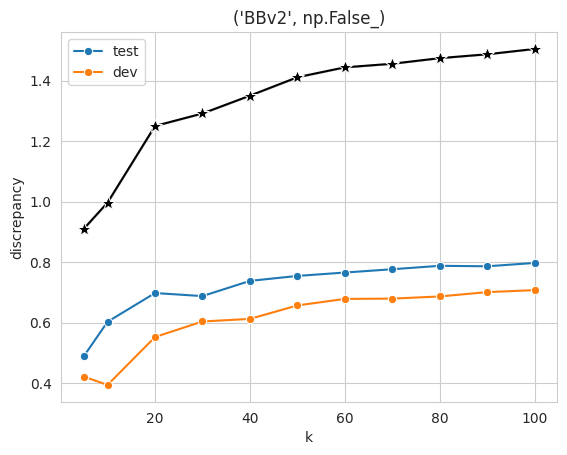

('BBv2', np.True_)


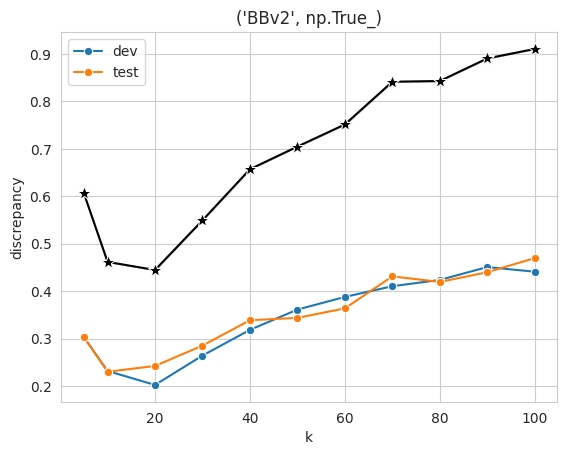

('MOv2', np.False_)


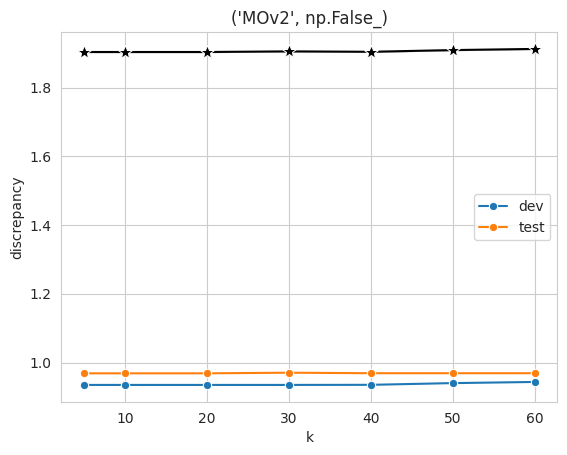

('MOv2', np.True_)


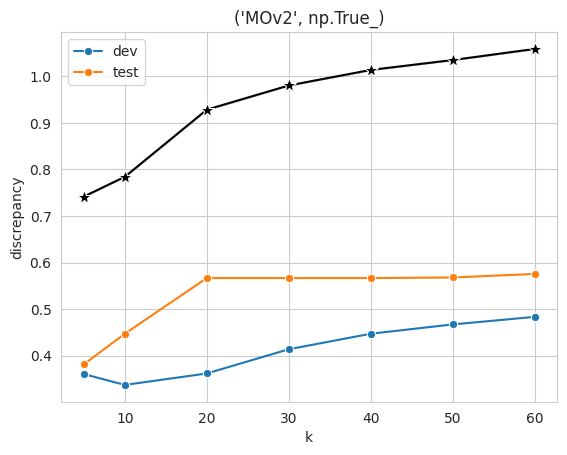

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

stats_df = pd.DataFrame(results["stats"].tolist())
stats_df["task_ids"] = results["subset"].apply(lambda x: [l.split(",")[0] for l in x.split("\n") if l])
stats_df.to_csv(path / "stats.csv", index=False)
print(stats_df)

for gid, gdf in stats_df.groupby(by=["scenario", "is_df_crit_log"]):
    print(gid)
    gdf["sum"] = gdf.groupby("k")["discrepancy"].transform("sum")
    ax = sns.lineplot(data=gdf, x="k", y="discrepancy", hue="subset_id", marker="o")
    ax = sns.lineplot(data=gdf, x="k", y="sum", marker="*", ax=ax, color="black", markersize=10)
    ax.set_title(gid)
    plt.show()

In [3]:
MIN_K = 10
for gid, gdf in stats_df.groupby(by=["scenario", "is_df_crit_log"]):
    print(gid)
    scenario, is_df_crit_log = gid
    new_df = pd.DataFrame()
    new_df["k"] = gdf["k"]
    new_df["which"] = gdf["subset_id"].map(lambda x: "s1" if x == "dev" else "s2")
    new_df["discrepancy"] = gdf["discrepancy"]
    new_df = new_df.reset_index(drop=True)
    new_df = new_df.sort_values(by=["k", "which"])
    new_df = new_df[["which", "k", "discrepancy"]]
    new_df = new_df[new_df["k"] >= MIN_K]
    info_fn = Path(f"data/{scenario}_{'lognorm' if is_df_crit_log else 'norm'}/info.csv")
    info_fn.parent.mkdir(parents=True, exist_ok=True)
    new_df.to_csv(info_fn, index=False)
    print(info_fn)

('BBv2', np.False_)
data/BBv2_norm/info.csv
('BBv2', np.True_)
data/BBv2_lognorm/info.csv
('MOv2', np.False_)
data/MOv2_norm/info.csv
('MOv2', np.True_)
data/MOv2_lognorm/info.csv


Final Selection:
BBv2, log, k=20
MOv2, log, k=10